# Ruta más corta por **tiempo**
**Curso:** Logística IIND 3221 — Uniandes  

Nombre:

Código:

Sección:

Objetivo: construir un grafo dirigido desde datos tabulares y obtener el camino de **mínimo tiempo** entre un origen y un destino. En caso de empates, desempatar por **distancia**.


## Red de estaciones de drones en SUGADA S.A.

SUGADA S.A. es una empresa líder en entregas con drones que ha crecido de forma acelerada en los últimos años. La expansión de pedidos y la construcción de nuevas estaciones de carga y operación ha generado una red aérea cada vez más amplia y compleja. Esto ha ocasionado que, en ciertas zonas, los planificadores enfrenten dificultades para encontrar las rutas más eficientes en tiempo y distancia.Usted trabaja en el área de Optimización de Rutas de SUGADA S.A. 

La aplicación interna de planificación ha sido confiable, pero debido a restricciones de espacio aéreo y recorridos cada vez más intrincados, algunas rutas sugeridas no garantizan los tiempos de entrega deseados ni la eficiencia logística esperada. Con el objetivo de mejorar la operación y asegurar la satisfacción de los clientes, la dirección de SUGADA S.A. le ha asignado la tarea de usar un algoritmo de rutas sobre grafos para optimizar los trayectos de los drones en una zona crítica de la ciudad. Su trabajo permitirá que la aplicación recomiende rutas más rápidas y seguras considerando la red de estaciones disponibles.

En el archivo de Excel Datos.xlsx se encuentra la información de esta subred.

## 1. Cargar librerías

In [2]:

# TODO: importa pandas y networkx (y otras que necesites)

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import heapq


## 1.1. Leer datos

In [3]:

# TODO: lee el archivo de datos con columnas:

df = pd.read_excel('Datos.xlsx') # Asumiendo que datos esta en el mismo directorio que este Jupyter Notebook

## 1.2. Construir grafo dirigido

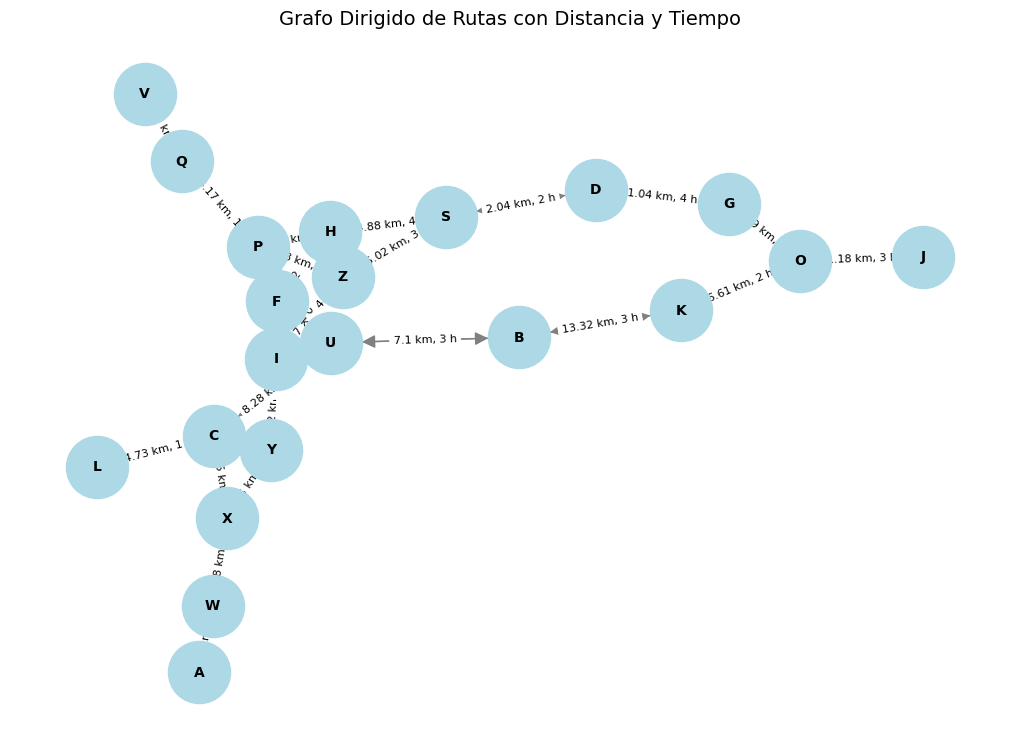

In [4]:

# TODO: crea un DiGraph y agrega aristas con atributos 'distancia' y 'tiempo'
G = nx.DiGraph()

for index, row in df.iterrows():
    origen = row['Nodo salida']
    destino = row['Nodo llegada']
    distancia = row['Distancia (km)']
    tiempo = row['Tiempo (h)']
    G.add_edge(origen, destino, distancia=distancia, tiempo=tiempo)
    
# Dibujar grafo
plt.figure(figsize=(10,7))
pos = nx.spring_layout(G, seed=42)

# Dibujar nodos y aristas

nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold', arrows=True, arrowsize=20, edge_color="gray")

edge_labels = {(u,v): f"{d['distancia']} km, {d['tiempo']} h" for u,v,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=8)

plt.title("Grafo Dirigido de Rutas con Distancia y Tiempo", fontsize=14)
plt.show()


## 2. Implementar Dijkstra minimizando **tiempo** (desempate por **distancia**)

In [ ]:

# TODO: implementa dijkstra(grafo, inicio) priorizando TIEMPO y desempate por DISTANCIA


def dijkstra_modificado(G, source):

    tiempos = {nodo: float('inf') for nodo in G.nodes()} # Diccionario de tiempos
    distancias = tiempos.copy() # Diccionario de distancias
    precedencias = {nodo: None for nodo in G.nodes()} # Diccionario de precedencias para reconstruir el camino
    
    distancias[source] = 0 # La distancia al nodo inicial es 0
    tiempos[source] = 0 # El tiempo al nodo inicial es 0
    
    # Lista para< almacenar nodos no visitados
    nodos_no_visitados = list(G.nodes())
    
    heap = [(0, 0, source)] # (tiempo, distancia, nodo)
    
    while heap:
        tiempo_actual, distancia_actual, nodo_actual = heapq.heappop(heap)  # Nodo con el menor tiempo
        
        if nodo_actual not in nodos_no_visitados:
            continue # Si ya fue visitado, saltar
        nodos_no_visitados.remove(nodo_actual) # Marcar como visitado
        
        for vecino in G.neighbors(nodo_actual):
            tiempo_arista = G[nodo_actual][vecino]['tiempo']
            distancia_arista = G[nodo_actual][vecino]['distancia']
            
            nuevo_tiempo = tiempo_actual + tiempo_arista
            nueva_distancia = distancia_actual + distancia_arista
            
            # Si encontramos un camino más rápido o igual pero más corto
            if (nuevo_tiempo < tiempos[vecino]) or (nuevo_tiempo == tiempos[vecino] and nueva_distancia < distancias[vecino]):
                tiempos[vecino] = nuevo_tiempo
                distancias[vecino] = nueva_distancia
                precedencias[vecino] = nodo_actual
                heapq.heappush(heap, (nuevo_tiempo, nueva_distancia, vecino))
    
    return tiempos, distancias, precedencias

resultado = dijkstra_modificado(G, 'A')
tiempos, distancias, precedencias = resultado
    

Tiempos desde A: {'G': 27, 'O': 26, 'P': 19, 'Q': 20, 'I': 15, 'F': 16, 'Y': 12, 'J': 29, 'B': 21, 'K': 24, 'H': 17, 'S': 21, 'D': 23, 'Z': 19, 'U': 18, 'X': 10, 'C': 14, 'V': 22, 'L': 15, 'W': 5, 'A': 0}
Distancias desde A: {'G': 90.58000000000001, 'O': 68.14, 'P': 90.05000000000001, 'Q': 104.22000000000001, 'I': 37.42, 'F': 56.0, 'Y': 35.0, 'J': 69.32000000000001, 'B': 48.21, 'K': 61.53, 'H': 72.62, 'S': 87.5, 'D': 89.54, 'Z': 47.120000000000005, 'U': 41.11, 'X': 17.15, 'C': 32.83, 'V': 115.20000000000002, 'L': 47.56, 'W': 1.47, 'A': 0}
Precedencias: {'G': 'D', 'O': 'K', 'P': 'H', 'Q': 'P', 'I': 'Y', 'F': 'I', 'Y': 'X', 'J': 'O', 'B': 'U', 'K': 'B', 'H': 'F', 'S': 'H', 'D': 'S', 'Z': 'I', 'U': 'C', 'X': 'W', 'C': 'X', 'V': 'Q', 'L': 'C', 'W': 'A', 'A': None}


## 2.1. Reconstruir el camino (usando `precedencias`)

In [22]:

# TODO: implementa reconstruir_camino(precedencias, destino)

destino = input("Ingresa el nodo destino (por ejemplo, 'V'): ")

def reconstruir_camino(precedencias, destino):
    camino = []
    actual = destino
    while actual is not None:
        camino.append(actual)
        actual = precedencias[actual]
    camino.reverse()
    return camino

camino = reconstruir_camino(precedencias, destino) 
print(f"Camino más corto: {camino}")

Camino más corto: ['A', 'W', 'X', 'Y', 'I', 'F', 'H', 'P', 'Q', 'V']


## 2.2. Calcular distancia total del camino

In [21]:

# TODO: define origen y destino, corre tu Dijkstra, reconstruye el camino

origen = input("Ingresa el nodo origen (por ejemplo, 'A'): ")
destino = input("Ingresa el nodo destino (por ejemplo, 'V'): ")

def calcular_ruta(G, origen, destino):
    tiempos, distancias, precedencias = dijkstra_modificado(G, origen)
    camino = reconstruir_camino(precedencias, destino)
    tiempo_total = tiempos[destino]
    distancia_total = distancias[destino]
    return camino, tiempo_total, distancia_total

camino, tiempo_total, distancia_total = calcular_ruta(G, origen, destino)

print(f"Camino: {camino}")
print(f"Tiempo total: {tiempo_total} horas")
print(f"Distancia total: {distancia_total} km")



Camino: ['A', 'W', 'X', 'Y', 'I', 'F', 'H', 'P', 'Q', 'V']
Tiempo total: 22 horas
Distancia total: 115.20000000000002 km


## 3. Comparar con `networkx.shortest_path(..., weight='tiempo')`

In [18]:

# TODO: calcula el camino por networkx, y compara

resultado_nx = nx.shortest_path(G, source='A', target='V', weight='tiempo')
print("Camino más corto usando NetworkX de A a F:", resultado_nx)

print("Camino más corto usando Dijsktra modificado de A a F:", camino)



Camino más corto usando NetworkX de A a F: ['A', 'W', 'X', 'Y', 'I', 'F', 'H', 'P', 'Q', 'V']
Camino más corto usando Dijsktra modificado de A a F: ['A', 'W', 'X', 'Y', 'I', 'F', 'H', 'P', 'Q', 'V']
